In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [3]:
data= pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0

In [5]:
data.shape

(205, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight   curbweight  enginesize   boreratio      stroke  compressionratio  horsepower      peakrpm     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   205.000000  205.000000  205.000000  205.000000        205.000000  205.000000   205.000000  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878  2555.565854  126.907317    3.329756    3.255415         10.142537  104.117073  5125.121951   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   520.680204   41.642693    0.270844    0.313597          3.972040   39.544167   476.985643    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000  1488.000000   61.000000    2.540000    2.070000          7.000000   48.000000  4150.000000   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000  2145.000000   97.000000    3.150000    3.110000          8.600000   70.000000  4800.000000   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000  2414.000000  120.000000    3.310000    3.290000          9.000000   95.000000  5200.000000   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000  2935.000000  141.000000    3.580000    3.410000          9.400000  116.000000  5500.000000   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000  4066.000000  326.000000    3.940000    4.170000         23.000000  288.000000  6600.000000   49.000000   54.000000  45400.000000

In [8]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [9]:
data['CarName'].value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi outlander               3
mazda 626                          3
toyota mark ii                     3
mitsubishi g4                      3
honda civic                        3
mitsubishi mirage g4               3
saab 99gle                         2
toyota starlet                     2
toyota corolla 1200                2
bmw 320i                           2
toyota corolla liftback            2
volvo 244dl                        2
mazda rx-7 gs                      2
saab 99e                           2
volvo 144ea                        2
nissan latio                       2
honda civic cvcc                   2
volkswagen dasher                  2
peugeot 604sl                      2
mazda rx-4                         2
isuzu D-Max                        2
plymouth fury iii                  2
volvo 145e (sw)                    2
n

In [10]:
#Splitting car make and model
data['car make'] = data["CarName"].str.split(" ", n=1, expand=True)[0]

#Converting the car make to lowercase for consistency
data['car make']=data['car make'].str.lower()
data['car make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

In [11]:
#Removing data inconsistencies
data['car make']=data['car make'].replace('maxda','mazda')
data['car make']=data['car make'].replace('porcshce','porsche')
data['car make']=data['car make'].replace('toyouta','toyota')
data['car make']=data['car make'].replace('vokswagen','volkswagen')
data['car make']=data['car make'].replace('vw','volkswagen')
data['car make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           mazda
51           mazda
52          

In [12]:
# #Extracting the car model
# data['car model'] = data["CarName"].str.split(" ", n=1, expand=True)[1]
# data['car model']=data['car model'].str.lower()
# data['car model']

In [13]:
# data['car model'].value_counts()

In [14]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [15]:
data['doornumber'].value_counts()


four    115
two      90
Name: doornumber, dtype: int64

In [16]:
#Pair plot to understand numerical variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, size=2)
plt.show()

<Figure size 3200x3200 with 272 Axes>

In [17]:
#Copying data to data_dum
data_dum = pd.DataFrame(data)


In [18]:
data_dum.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price     car make
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0         audi
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0         audi

In [19]:
col_list=data_dum.columns.tolist()
col_list


['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'car make']

In [20]:
#dummy_list = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem','car model', 'car make']

#dummy_list = ['carbody', 'drivewheel', 'enginetype', 'cylindernumber','fuelsystem', 'car make', 'car model']
dummy_list = ['carbody', 'drivewheel', 'enginetype', 'cylindernumber','fuelsystem','car make']

In [21]:
dummies = pd.get_dummies(data_dum[dummy_list],prefix_sep='_', drop_first=True)
dummies

carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  cylindernumber_four  cylindernumber_six  cylindernumber_three  cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  car make_audi  car make_bmw  car make_buick  car make_chevrolet  car make_dodge  car make_honda  car make_isuzu  car make_jaguar  car make_mazda  car make_mercury  car make_mitsubishi  car make_nissan  car make_peugeot  car make_plymouth  car make_porsche  car make_renault  car make_saab  car make_subaru  car make_toyota  car make_volkswagen  car make_volvo
0                  0                  0              0              0               0               1                 0             0               0                0                0                 0                    0                    1                   0                     0                      0                   0                0                0               0               0                1                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0                  0                 0                 0              0                0                0                    0               0
1                  0                  0              0              0               0               1                 0             0               0                0                0                 0                    0                    1                   0                     0                      0                   0                0                0               0               0                1                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0                  0                 0                 0              0                0                0                    0               0
2                  0                  1              0              0               0               1                 0             0               0                0                1                 0                    0                    0                   1                     0                      0                   0                0                0               0               0                1                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0                  0                 0                 0              0                0                0                    0               0
3                  0                  0              1              0               1               0                 0             0               1                0                0                 0                    0                    1                   0                     0                      0                   0                0                0               0               0                1                0                0              1             0               0                   0               0               0               0                0               0                 0                    0                0                 0                  0                 0                 0              0                0                0        

In [22]:
dummies.shape

(205, 46)

In [23]:
data_dum = pd.concat([data_dum, dummies], axis = 1)
data_dum.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price     car make  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  cylindernumber_four  cylindernumber_six  cylindernumber_three  cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  car make_audi  car make_bmw  car make_buick  car make_chevrolet  car make_dodge  car make_honda  car make_isuzu  car make_jaguar  car make_mazda  car make_mercury  car make_mitsubishi  car make_nissan  car make_peugeot  \
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0  alfa-romero                0                  0              0              0               0               1                 0             0               0                0                0                 0                    0                    1                   0                     0                      0                   0                0                0               0               0                1                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0   
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0  alfa-romero                0                  0              0              0               0               1                 0             0               0                0                0                 0                    0                    1                   0                     0                      0                   0                0                0               0               0                1                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0   
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0  alfa-romero                0                  1              0              0               0               1                 0             0               0                0                1                 0                    0                    0                   1                     0                      0                   0                0                0               0               0                1                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0   
3       4          2               audi 100 ls      gas

In [24]:
data_dum.shape

(205, 73)

In [25]:
# List of binary variables to map

data_dum['fueltype'] = data_dum['fueltype'].map({'gas': 1, "diesel": 0})
data_dum['aspiration'] = data_dum['aspiration'].map({'std': 1, "turbo": 0})
data_dum['doornumber'] = data_dum['doornumber'].map({'two': 1, "four": 0})
data_dum['enginelocation'] = data_dum['enginelocation'].map({'rear': 1, "front": 0})

In [26]:
data_dum.shape


(205, 73)

In [27]:
# Dropping variables as we have created the dummies for it

data_dum.drop(['CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','car_ID','car make'], axis = 1, inplace = True)

In [28]:
data_dum.shape

(205, 65)

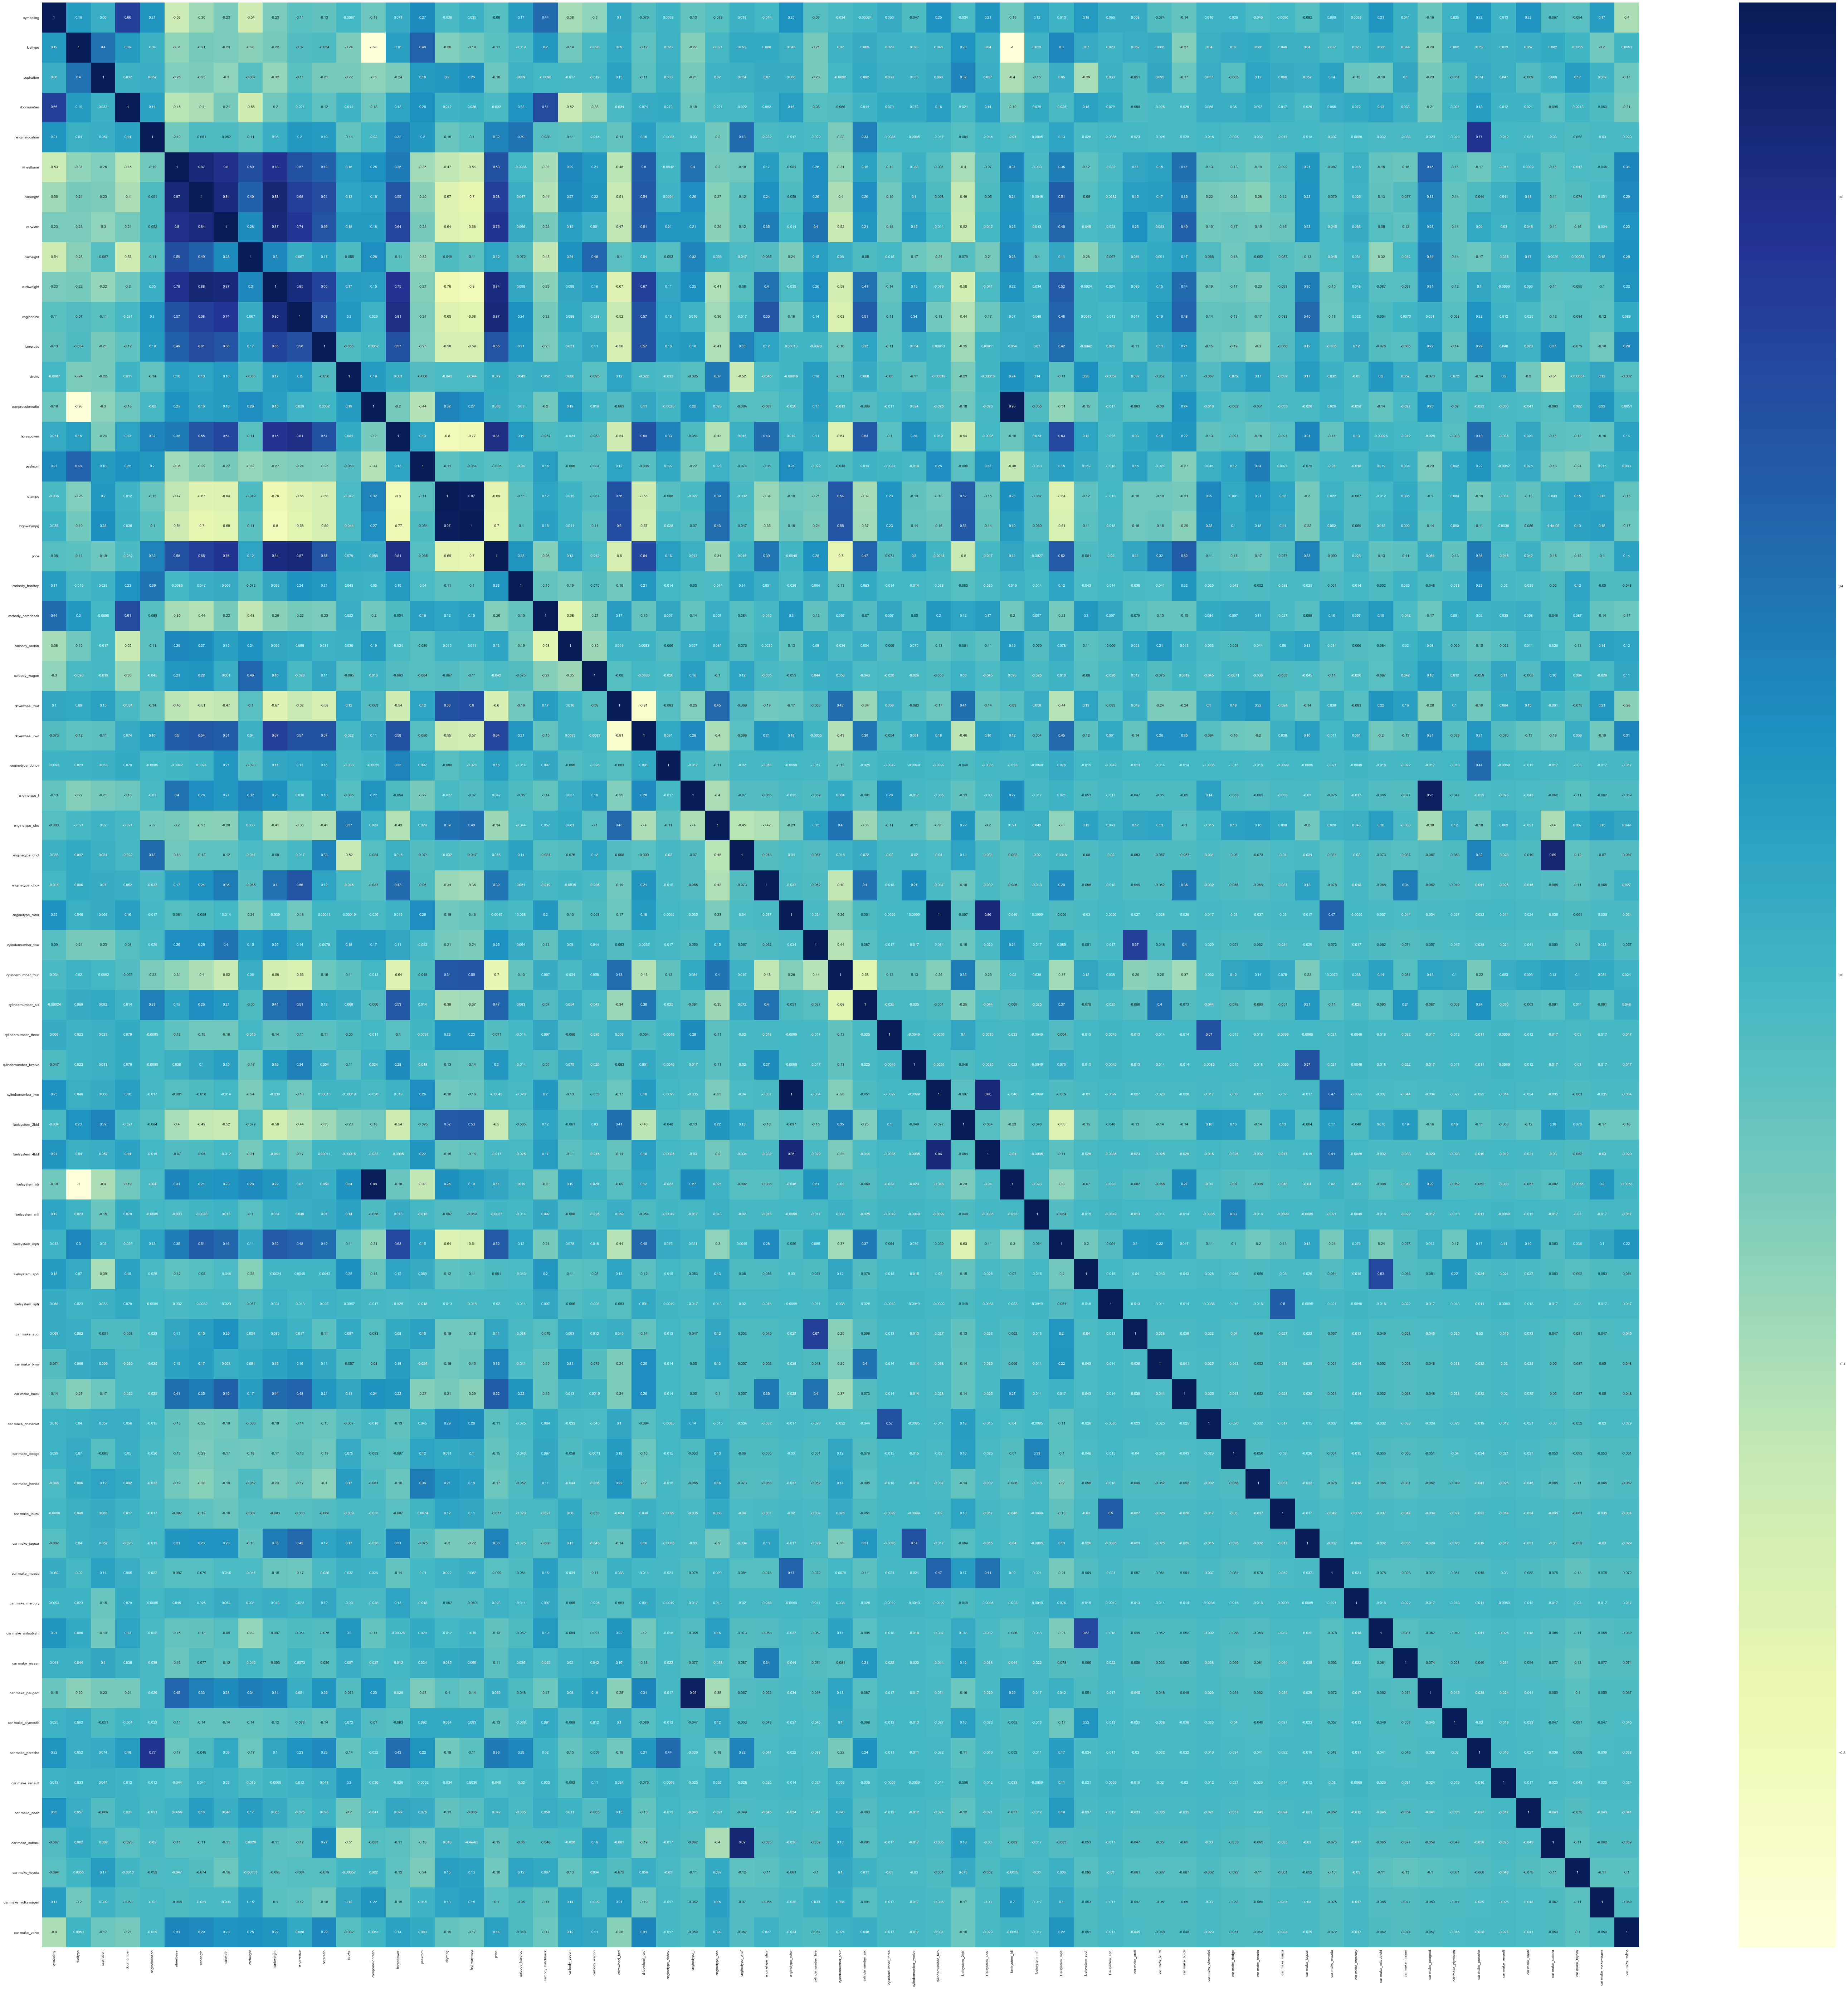

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (100,100))        # Size of the figure
sns.heatmap(data_dum.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [30]:
#Train test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data_dum, train_size = 0.8, test_size = 0.2, random_state = 100)

In [31]:
#Standardizing numeric variables using MinMax scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight', 'enginesize', 'boreratio',
 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
df_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  cylindernumber_four  cylindernumber_six  cylindernumber_three  cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  car make_audi  car make_bmw  car make_buick  car make_chevrolet  car make_dodge  car make_honda  car make_isuzu  car make_jaguar  car make_mazda  car make_mercury  car make_mitsubishi  car make_nissan  car make_peugeot  car make_plymouth  car make_porsche  car make_renault  car make_saab  car make_subaru  car make_toyota  \
3          0.8         1           1           0               0   0.455172   0.577236  0.491667   0.541667    0.329325    0.181132   0.404762  0.611111           0.18750    0.225000  0.551020  0.305556    0.351351  0.243998                0                  0              1              0               1               0                 0             0               1                0                0                 0                    0                    1                   0                     0                      0                   0                0                0               0               0                1                0                0              1             0               0                   0               0               0               0                0               0                 0                    0                0                 0                  0                 0                 0              0                0                0   
157        0.4         1           1           0               0   0.313793   0.409756  0.341667   0.416667    0.240884    0.139623   0.404762  0.424242           0.12500    0.091667  0.265306  0.472222    0.540541  0.057463                0                  1              0              0               1               0                 0             0               1                0                0                 0                    0                    1                   0                     0                      0                   0                1                0               0               0                0                0                0              0             0               0                   0               0               0               0                0               0                 0                    0                0                 0                  0                 0                 0              0                0                1   
81         1.0         1           1           1               0   0.334483   0.518699  0.425000   0.133333    0.325834    0.230189   0.531746  0.641414           0.09375    0.166667  0.346939  0.333333    0.405405  0.093406                0                  1              0              0               1               0                 0             0               1                0                0                 0                    0                    1                   0                     0                      0                   0                1                0               0               0                0                0                0              0             0               0                   0               0               0               0                0               0                 0                    1                0                 0                  0                 0                 0              0                0                0   
32         0.6         1     

In [34]:
df_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation   wheelbase   carlength    carwidth   carheight  curbweight  enginesize   boreratio      stroke  compressionratio  horsepower     peakrpm     citympg  highwaympg       price  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  cylindernumber_four  cylindernumber_six  cylindernumber_three  cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  car make_audi  car make_bmw  car make_buick  car make_chevrolet  car make_dodge  car make_honda  car make_isuzu  car make_jaguar  car make_mazda  car make_mercury  car make_mitsubishi  car make_nissan  car make_peugeot  car make_plymouth  car make_porsche  car make_renault  car make_saab  car make_subaru  \
count  164.000000  164.000000  164.000000  164.000000      164.000000  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000        164.000000  164.000000  164.000000  164.000000  164.000000  164.000000        164.00000         164.000000     164.000000     164.000000      164.000000      164.000000        164.000000    164.000000      164.000000       164.000000       164.000000         164.00000           164.000000           164.000000          164.000000            164.000000             164.000000           164.00000       164.000000       164.000000      164.000000      164.000000       164.000000       164.000000            164.0     164.000000    164.000000      164.000000          164.000000      164.000000      164.000000      164.000000       164.000000      164.000000             164.0           164.000000       164.000000        164.000000         164.000000         164.00000        164.000000     164.000000       164.000000   
mean     0.567073    0.896341    0.829268    0.432927        0.012195    0.404605    0.519899    0.454726    0.482927    0.398579    0.236493    0.489983    0.542159          0.202866    0.221037    0.400448    0.352642    0.385794    0.211153          0.02439           0.341463       0.469512       0.134146        0.628049        0.323171          0.006098      0.054878        0.719512         0.079268         0.054878           0.02439             0.060976             0.762195            0.121951              0.006098               0.006098             0.02439         0.353659         0.018293        0.103659        0.006098         0.414634         0.042683              0.0       0.042683      0.036585        0.030488            0.018293        0.054878        0.067073        0.018293         0.018293        0.085366               0.0             0.067073         0.091463          0.048780           0.030488           0.02439          0.012195       0.018293         0.067073   
std      0.241953    0.305751    0.377427    0.496998        0.110092    0.197731    0.197651    0.179980    0.205820    0.202330    0.148945    0.203913    0.153546          0.255795    0.164011    0.192302    0.185496    0.188116    0.212491          0.15473           0.475653       0.500598       0.341853        0.484806        0.469120          0.078087      0.228440        0.450613         0.270984         0.228440           0.15473             0.240018             0.427043            0.328232              0.078087               0.078087             0.15473         0.479569         0.134418        0.305751        0.078087         0.494168         0.202760              0.0       0.202760      0.188317        0.172452            0.134418        0.228440        0.250915        0.134418         0.134418        0.280281               0.0             0.250915         0.289150          0.216069           0.172452           0.15473          0.110092       0.134418         0.250915   
min      0.000000    0.0

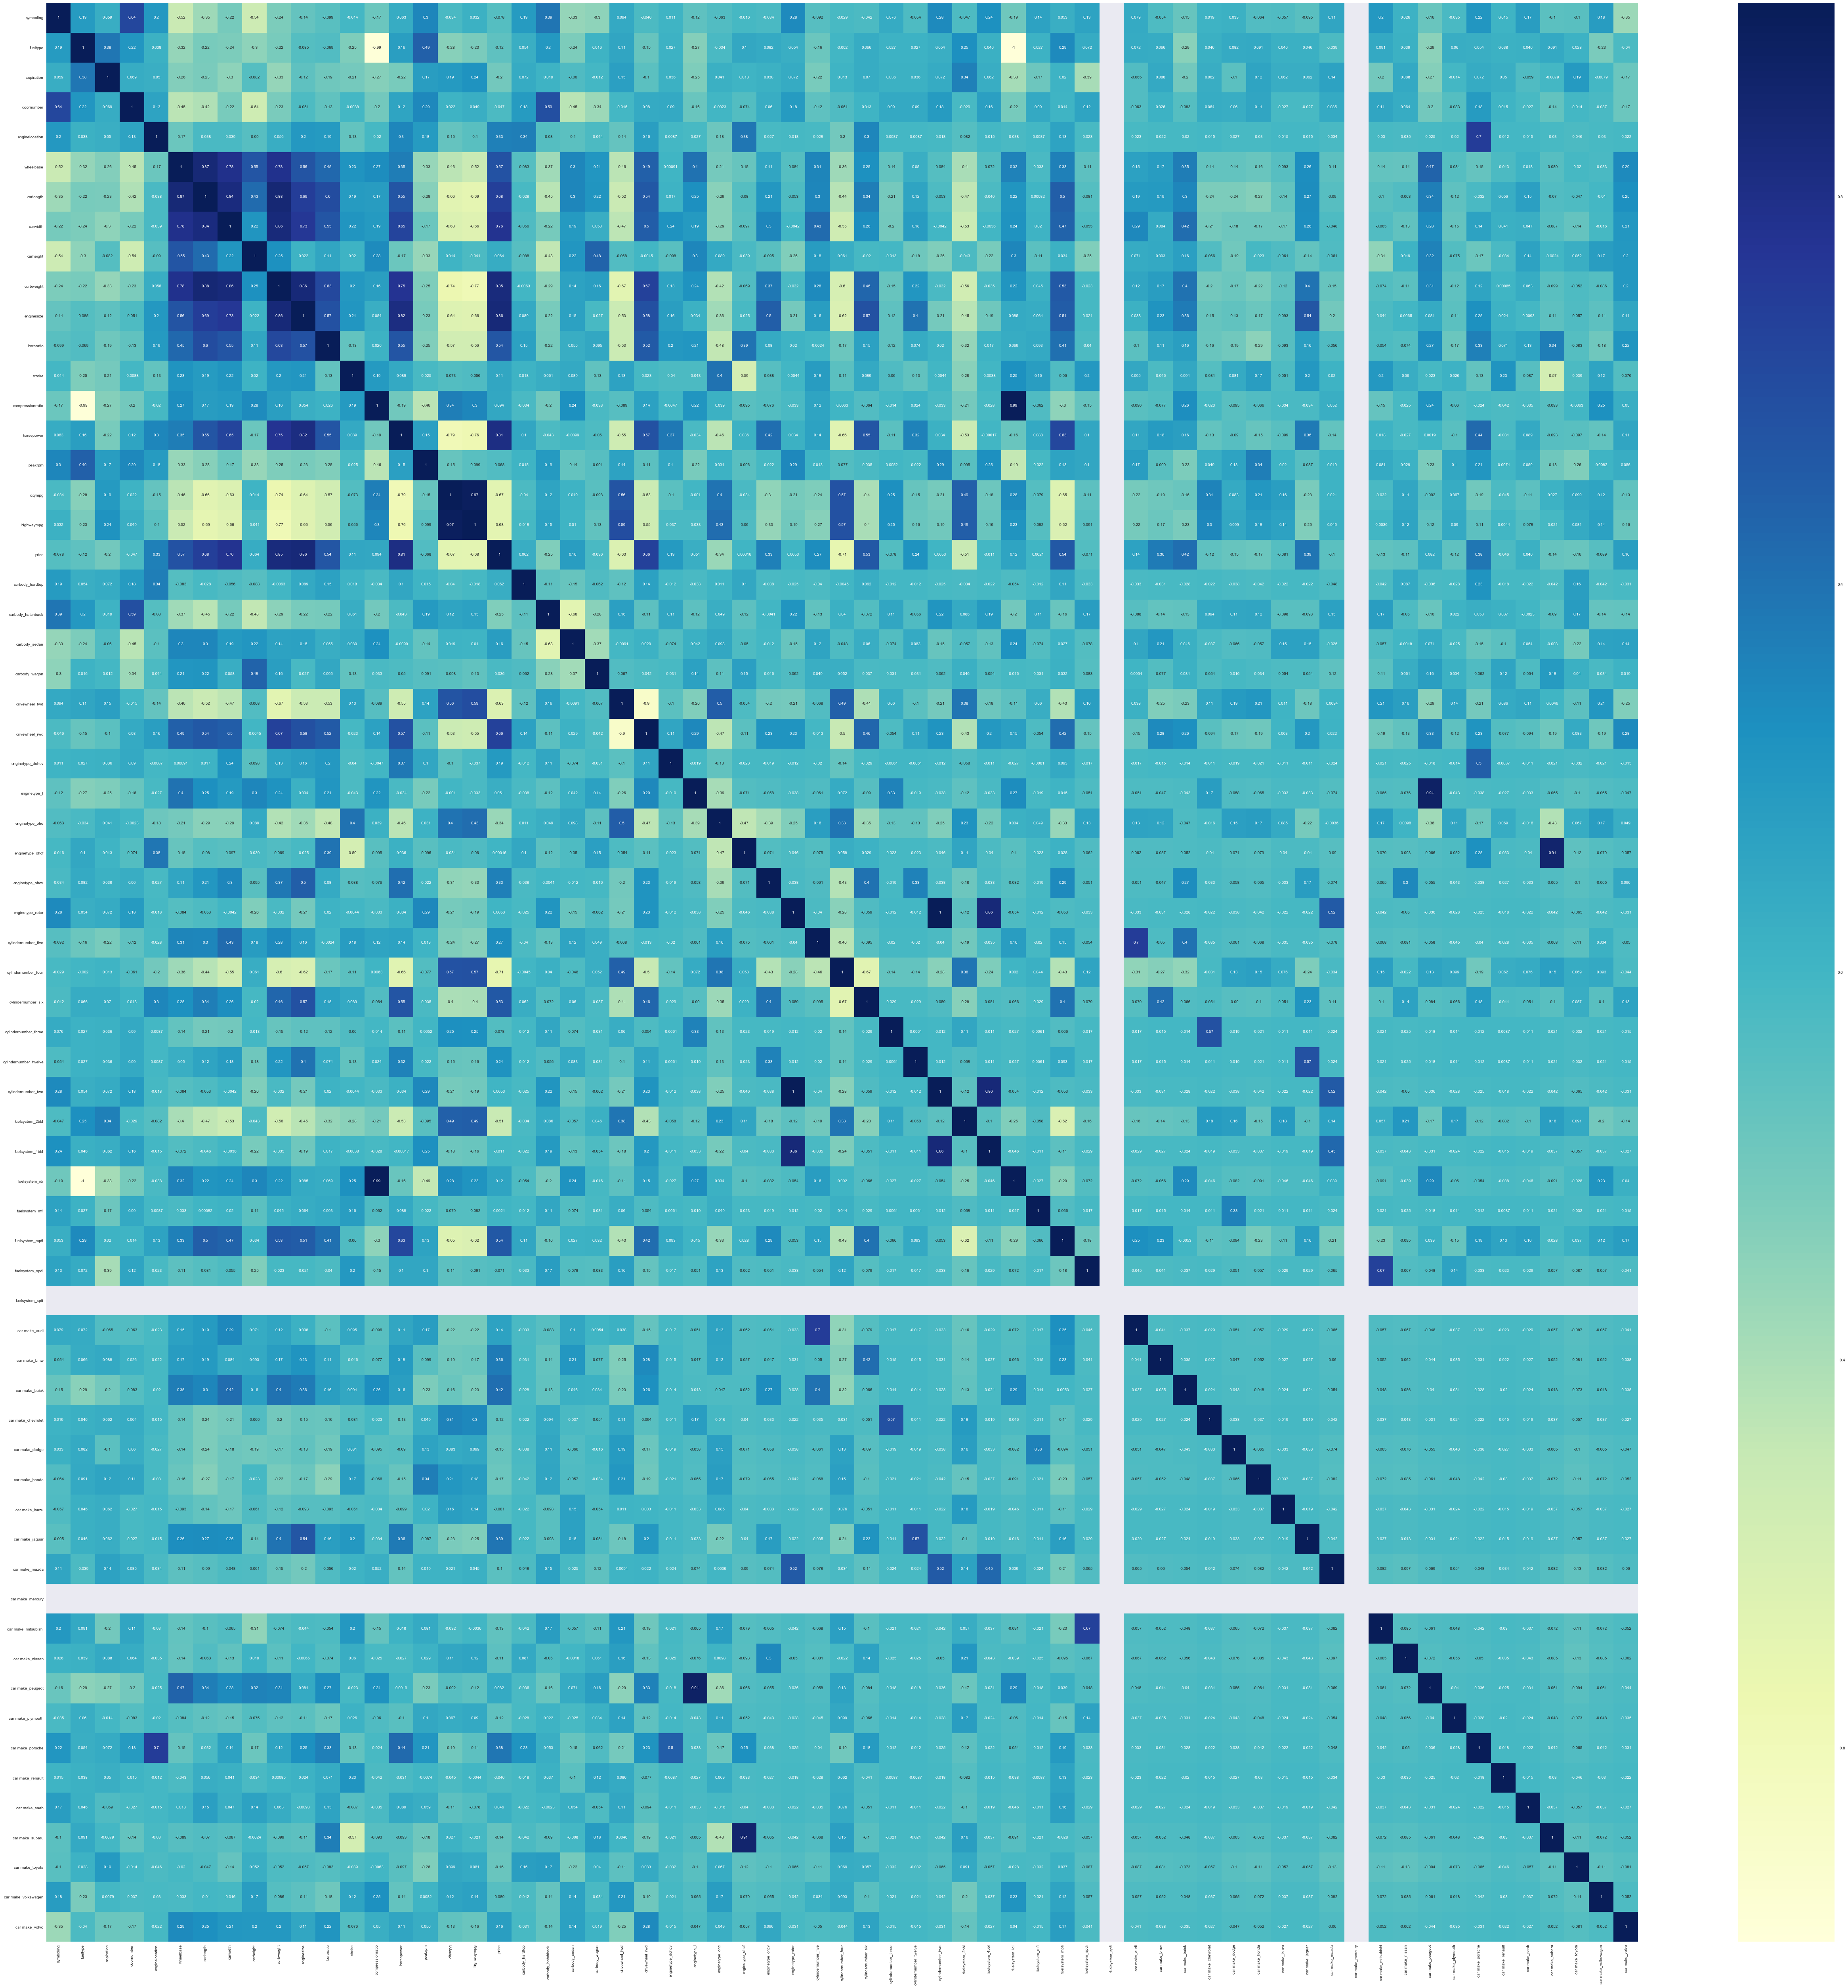

In [35]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (90, 90))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [36]:
y_train = df_train.pop('price')
X_train = df_train

In [37]:
# correlation=[]
# correl=df_train.corr()
# #correlation=correlation.append(correl)
# correl.to_csv("C:\\Users\\megha goyal\\Documents\\Upgrad\\Case Studies\\Geely_Auto_MLR\\file_1.csv")

In [38]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained

lr_1.params

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const        -0.080020
enginesize    1.231207
dtype: float64

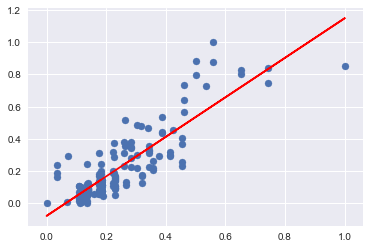

In [39]:
# visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.08 + 1.23*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [40]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     472.8
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           6.58e-50
Time:                        19:00:04   Log-Likelihood:                 133.79
No. Observations:                 164   AIC:                            -263.6
Df Residuals:                     162   BIC:                            -257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0800      0.016     -5.061      0.0

In [41]:
# Assign all the feature variables to X
X_train_lm = X_train[['drivewheel_rwd','carlength','carwidth','horsepower','curbweight', 'enginesize']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const            -0.128774
drivewheel_rwd    0.078625
carlength        -0.089048
carwidth          0.266549
horsepower        0.269191
curbweight        0.139751
enginesize        0.526035
dtype: float64

In [42]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           7.86e-58
Time:                        19:00:04   Log-Likelihood:                 167.21
No. Observations:                 164   AIC:                            -320.4
Df Residuals:                     157   BIC:                            -298.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1288      0.022     -5.

In [43]:
# Assign all the feature variables to X
X_train_lm = X_train[['drivewheel_rwd','carwidth','horsepower','curbweight', 'enginesize']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const            -0.139131
drivewheel_rwd    0.079370
carwidth          0.235952
horsepower        0.293198
curbweight        0.063927
enginesize        0.537237
dtype: float64

In [44]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.04e-58
Time:                        19:00:05   Log-Likelihood:                 166.64
No. Observations:                 164   AIC:                            -321.3
Df Residuals:                     158   BIC:                            -302.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1391      0.020     -7.

In [45]:
# Assign all the feature variables to X
X_train_lm = X_train[['drivewheel_rwd','carwidth','horsepower','enginesize']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const            -0.138875
drivewheel_rwd    0.084810
carwidth          0.268739
horsepower        0.293137
enginesize        0.573476
dtype: float64

In [46]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     192.1
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           8.53e-60
Time:                        19:00:05   Log-Likelihood:                 166.43
No. Observations:                 164   AIC:                            -322.9
Df Residuals:                     159   BIC:                            -307.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1389      0.020     -7.

In [47]:
# X=X_train[['drivewheel_rwd','carwidth','horsepower', 'enginesize']]
# X.head()

In [48]:
#X_train_lm = X_train[col_list]
 
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const                   -5.524495e-02
symboling               -1.283677e-02
fueltype                -1.373456e-01
aspiration              -6.385683e-02
doornumber              -8.757939e-03
enginelocation           2.040914e-01
wheelbase                2.731618e-01
carlength               -1.758249e-01
carwidth                 1.694573e-01
carheight               -1.671590e-01
curbweight               3.706734e-01
enginesize               1.585261e+00
boreratio               -4.638477e-01
stroke                  -1.696802e-01
compressionratio        -3.065542e-01
horsepower              -2.373155e-02
peakrpm                  1.688843e-01
citympg                  4.307873e-02
highwaympg               4.814232e-02
carbody_hardtop         -1.066135e-01
carbody_hatchback       -1.018931e-01
carbody_sedan           -7.708922e-02
carbody_wagon           -6.620746e-02
drivewheel_fwd           4.055261e-03
drivewheel_rwd           2.382826e-02
enginetype_dohcv         1.433126e-01
enginetype_l

In [49]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     67.81
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.07e-62
Time:                        19:00:05   Log-Likelihood:                 321.07
No. Observations:                 164   AIC:                            -524.1
Df Residuals:                     105   BIC:                            -341.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [50]:
# # Dropping highly correlated variables and insignificant variables

# X = X_train.drop('fuelsystem_2bbl', 1,)

In [51]:
# # Build a third fitted model
# X_train_lm = sm.add_constant(X)
# lr_6 = sm.OLS(y_train, X_train_lm).fit()
# # Print the summary of the model
# print(lr_6.summary())

In [52]:
# # Calculate the VIFs again for the new model

# vif = pd.DataFrame()
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = vif['VIF'].round(decimals=2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('fueltype', False, 16),
 ('aspiration', False, 31),
 ('doornumber', False, 53),
 ('enginelocation', True, 1),
 ('wheelbase', False, 22),
 ('carlength', False, 25),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 13),
 ('horsepower', False, 48),
 ('peakrpm', False, 17),
 ('citympg', False, 50),
 ('highwaympg', False, 30),
 ('carbody_hardtop', False, 27),
 ('carbody_hatchback', False, 26),
 ('carbody_sedan', False, 29),
 ('carbody_wagon', False, 28),
 ('drivewheel_fwd', False, 55),
 ('drivewheel_rwd', False, 41),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 40),
 ('enginetype_ohcf', False, 18),
 ('enginetype_ohcv', False, 49),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 9),
 ('cylindernumber_three

In [56]:
col = X_train.columns[rfe.support_]
col

Index([u'enginelocation', u'carwidth', u'curbweight', u'enginesize', u'boreratio', u'enginetype_rotor', u'cylindernumber_three', u'cylindernumber_twelve', u'car make_bmw', u'car make_porsche'], dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index([u'symboling', u'fueltype', u'aspiration', u'doornumber', u'wheelbase', u'carlength', u'carheight', u'stroke', u'compressionratio', u'horsepower', u'peakrpm', u'citympg', u'highwaympg', u'carbody_hardtop', u'carbody_hatchback', u'carbody_sedan', u'carbody_wagon', u'drivewheel_fwd', u'drivewheel_rwd', u'enginetype_dohcv', u'enginetype_l', u'enginetype_ohc', u'enginetype_ohcf', u'enginetype_ohcv', u'cylindernumber_five', u'cylindernumber_four', u'cylindernumber_six', u'cylindernumber_two', u'fuelsystem_2bbl', u'fuelsystem_4bbl', u'fuelsystem_idi', u'fuelsystem_mfi', u'fuelsystem_mpfi', u'fuelsystem_spdi', u'fuelsystem_spfi', u'car make_audi', u'car make_buick', u'car make_chevrolet', u'car make_dodge', u'car make_honda', u'car make_isuzu', u'car make_jaguar', u'car make_mazda', u'car make_mercury', u'car make_mitsubishi', u'car make_nissan', u'car make_peugeot', u'car make_plymouth', u'car make_renault', u'car make_saab', u'car make_subaru', u'car make_toyota',
       u'car make_vo

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
lm_6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.56e-76
Time:                        19:00:06   Log-Likelihood:                 223.86
No. Observations:                 164   AIC:                            -425.7
Df Residuals:                     153   BIC:                            -391.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const  11.30
3              curbweight   9.08
4              enginesize   7.32
2                carwidth   4.38
10       car make_porsche   2.37
1          enginelocation   2.27
5               boreratio   1.90
8   cylindernumber_twelve   1.48
6        enginetype_rotor   1.23
9            car make_bmw   1.13
7    cylindernumber_three   1.05

In [62]:
#Dropping the insignificant variable
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1) #cylindernumber_twelve

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm_7 = sm.OLS(y_train,X_train_lm).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.29e-77
Time:                        19:00:07   Log-Likelihood:                 223.70
No. Observations:                 164   AIC:                            -427.4
Df Residuals:                     154   BIC:                            -396.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1545 

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const  11.27
3            curbweight   8.47
4            enginesize   5.26
2              carwidth   4.38
9      car make_porsche   2.36
1        enginelocation   2.25
5             boreratio   1.89
6      enginetype_rotor   1.17
8          car make_bmw   1.09
7  cylindernumber_three   1.05

In [65]:
X_train_new_1 = X_train_new.drop(["cylindernumber_three"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_1)
lm_8 = sm.OLS(y_train,X_train_lm).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           3.07e-77
Time:                        19:00:07   Log-Likelihood:                 219.91
No. Observations:                 164   AIC:                            -421.8
Df Residuals:                     155   BIC:                            -393.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1450      0.017  

In [66]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0             const  10.78
3        curbweight   8.46
4        enginesize   5.26
2          carwidth   4.29
8  car make_porsche   2.35
1    enginelocation   2.24
5         boreratio   1.88
6  enginetype_rotor   1.17
7      car make_bmw   1.09

In [67]:
X_train_new_2 = X_train_new_1.drop(["car make_porsche"], axis = 1) 
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_2)
lm_9 = sm.OLS(y_train,X_train_lm).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     208.9
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           7.64e-76
Time:                        19:00:07   Log-Likelihood:                 213.62
No. Observations:                 164   AIC:                            -411.2
Df Residuals:                     156   BIC:                            -386.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1625      0.017  

In [68]:
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0             const  9.82
3        curbweight  7.90
4        enginesize  5.20
2          carwidth  4.02
5         boreratio  1.75
1    enginelocation  1.20
6  enginetype_rotor  1.17
7      car make_bmw  1.09

In [69]:
X_train_new_3 = X_train_new_2.drop(["boreratio"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_3)
lm_10 = sm.OLS(y_train,X_train_lm).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     234.3
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           1.17e-75
Time:                        19:00:08   Log-Likelihood:                 210.25
No. Observations:                 164   AIC:                            -406.5
Df Residuals:                     157   BIC:                            -384.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1820      0.015  

In [70]:
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0             const  7.73
3        curbweight  7.45
4        enginesize  5.20
2          carwidth  4.01
1    enginelocation  1.16
5  enginetype_rotor  1.16
6      car make_bmw  1.09

In [71]:
X_train_new_4 = X_train_new_3.drop(['curbweight'], axis=1)
X_train_lm = sm.add_constant(X_train_new_4)
lm_11 = sm.OLS(y_train,X_train_lm).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     264.2
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           8.45e-75
Time:                        19:00:08   Log-Likelihood:                 205.20
No. Observations:                 164   AIC:                            -398.4
Df Residuals:                     158   BIC:                            -379.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1850      0.015  

In [72]:
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0             const  7.70
3        enginesize  2.86
2          carwidth  2.51
1    enginelocation  1.15
4  enginetype_rotor  1.11
5      car make_bmw  1.09

In [73]:
X_train_new_5 = X_train_new_4.drop(['carwidth'], axis=1)
X_train_lm = sm.add_constant(X_train_new_5)
lm_12 = sm.OLS(y_train,X_train_lm).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           4.14e-61
Time:                        19:00:08   Log-Likelihood:                 169.56
No. Observations:                 164   AIC:                            -329.1
Df Residuals:                     159   BIC:                            -313.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0850      0.013  

In [74]:
lm_12.params

const              -0.084977
enginelocation      0.334138
enginesize          1.177485
enginetype_rotor    0.252184
car make_bmw        0.203275
dtype: float64

In [75]:
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0             const  3.87
2        enginesize  1.15
4      car make_bmw  1.06
1    enginelocation  1.05
3  enginetype_rotor  1.05

In [76]:
X_train_new_6 = X_train_new_5.drop(['const'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = vif['VIF'].round(decimals=2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1        enginesize  1.13
3      car make_bmw  1.09
0    enginelocation  1.04
2  enginetype_rotor  1.00

In [77]:
#Predicting the the trained model
y_train_price = lm_12.predict(X_train_lm)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

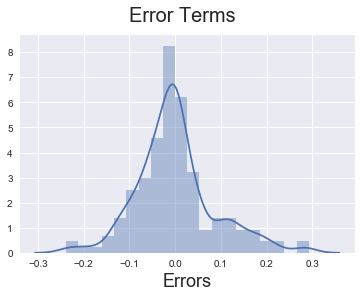

In [78]:
#Plotting the error residuals to check for normal curve
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [79]:
#Applying the scaling to the test set
#Standardizing numeric variables using MinMax scalar
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight', 'enginesize', 'boreratio',
 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
df_test.describe()

symboling   fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength   carwidth  carheight  curbweight  enginesize  boreratio     stroke  compressionratio  horsepower    peakrpm    citympg  highwaympg      price  carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_five  cylindernumber_four  cylindernumber_six  cylindernumber_three  cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  car make_audi  car make_bmw  car make_buick  car make_chevrolet  car make_dodge  car make_honda  car make_isuzu  car make_jaguar  car make_mazda  car make_mercury  car make_mitsubishi  car make_nissan  car make_peugeot  car make_plymouth  car make_porsche  car make_renault  car make_saab  car make_subaru  \
count  41.000000  41.000000   41.000000   41.000000       41.000000  41.000000  41.000000  41.000000  41.000000   41.000000   41.000000  41.000000  41.000000         41.000000   41.000000  41.000000  41.000000   41.000000  41.000000        41.000000          41.000000      41.000000      41.000000       41.000000       41.000000              41.0     41.000000       41.000000        41.000000        41.000000              41.0            41.000000            41.000000           41.000000                  41.0                   41.0                41.0        41.000000             41.0       41.000000            41.0        41.000000        41.000000        41.000000           41.0     41.000000       41.000000                41.0            41.0       41.000000       41.000000             41.0       41.000000         41.000000            41.000000        41.000000         41.000000          41.000000         41.000000              41.0      41.000000        41.000000   
mean    0.565854   0.926829    0.780488    0.463415        0.024390   0.477544   0.599207   0.517683   0.536992    0.476215    0.297561   0.618467   0.521803          0.170579    0.284959   0.388253   0.286585    0.315096   0.282376         0.097561           0.341463       0.463415       0.073171        0.414634        0.560976               0.0      0.073171        0.731707         0.048780         0.097561               0.0             0.024390             0.829268            0.097561                   0.0                    0.0                 0.0         0.195122              0.0        0.073171             0.0         0.634146         0.048780         0.024390            0.0      0.048780        0.073171                 0.0             0.0        0.048780        0.024390              0.0        0.073171          0.024390             0.048780         0.073171          0.073171           0.048780          0.024390               0.0       0.073171         0.024390   
std     0.278935   0.263652    0.419058    0.504854        0.156174   0.237096   0.202206   0.166533   0.190905    0.190466    0.180215   0.229504   0.177540          0.216386    0.159654   0.206137   0.156943    0.168417   0.245496         0.300406           0.480091       0.504854       0.263652        0.498779        0.502433               0.0      0.263652        0.448575         0.218085         0.300406               0.0             0.156174             0.380949            0.300406                   0.0                    0.0                 0.0         0.401218              0.0        0.263652             0.0         0.487652         0.218085         0.156174            0.0      0.218085        0.263652                 0.0             0.0        0.218085        0.156174              0.0        0.263652          0.156174             0.218085         0.263652          0.263652           0.218085          0.156174               0.0       0.263652         0.156174   
min     0.000000   0.000000    0.000000    0.000000        0.000000

In [81]:
y_test = df_test.pop('price')
X_test = df_test

In [82]:
# Assign all the feature variables to X
X_test_lm = X_test[X_train_new_6.columns]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_lm)

In [83]:
# Making predictions using the 12th model

y_pred_lm = lm_12.predict(X_test_lm)

Text(0,0.5,'y_pred')

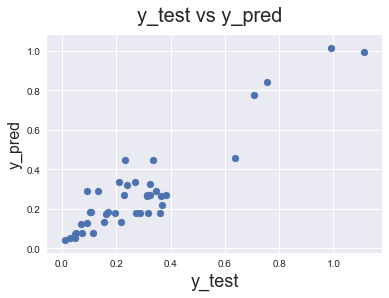

In [84]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [85]:
#We can see that the equation of our best fitted line is:

#price=0.334×enginelocation+1.178×enginesize+0.252×cylindernumber_two+0.203×car make_bmw